In [ ]:
# import data 

In [2]:
# import packages

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [39]:
# import data
data = pd.read_csv('US_Accidents_Dec19.csv')

# show the maximun text in dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# define a function to Extracting Missing Count and Unique Count by Column
def miss_unique(dataframe):
    unique_count = []
    for x in dataframe.columns:
        unique_count.append([x,len(dataframe[x].unique()),dataframe[x].isnull().sum()])

    return pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

miss_unique(data)

Column,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Unique,2974335,3,22,4,2743101,2761499,1002359,985099,298606,302907,12847,1597507,37399,160715,3,11686,1713,49,377153,1,5,1996,470782,828,972,101,995,82,25,148,257,121,2,2,2,2,2,2,2,2,2,2,2,2,1,3,3,3,3
Missing,0,0,728071,0,0,0,0,0,2246264,2246264,0,1,1917605,0,0,83,0,0,880,0,3163,5691,36705,56063,1852623,59173,48142,65691,45101,440840,1998358,65932,0,0,0,0,0,0,0,0,0,0,0,0,0,93,93,93,93


In [40]:
# select data from new york
data = data[data['City'] == 'New York']

In [41]:
len(data)

7127

In [42]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

In [43]:
data = data.sort_values(['Start_Time', 'Start_Lat','Start_Lng'])

In [44]:
data.head(200)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2349762,A-2349786,Bing,NaN,2,2016-03-24 09:56:12,2016-03-24 15:56:12,40.838860,-73.933200,40.845520,-73.930540,0.481,Ramp to Harlem River Dr Ramps - Accident.,NaN,Harlem River Dr S,R,New York,New York,NY,10032,US,US/Eastern,KNYC,2016-03-24 09:51:00,46.9,NaN,59.0,30.11,10.0,East,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2349788,A-2349812,Bing,NaN,3,2016-03-24 15:23:08,2016-03-24 21:23:08,40.848097,-73.935385,40.849335,-73.939876,0.250,At RT-9A/Henry Hudson Pky - Accident.,NaN,Trans-Manhattan Expy W,R,New York,New York,NY,10033,US,US/Eastern,KNYC,2016-03-24 14:58:00,53.1,NaN,55.0,30.03,10.0,Variable,5.8,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2349791,A-2349815,Bing,NaN,3,2016-03-24 15:45:40,2016-03-24 21:45:40,40.772694,-73.944951,40.771469,-73.946569,0.120,At 79th St - Accident.,NaN,FDR Dr N,R,New York,New York,NY,10028,US,US/Eastern,KNYC,2016-03-24 15:51:00,51.1,NaN,56.0,29.99,10.0,ENE,12.7,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2349801,A-2349825,Bing,NaN,2,2016-03-24 17:24:50,2016-03-24 23:24:50,40.805150,-73.932020,40.803580,-73.930760,0.127,At 2nd Ave/125th St/Exit 19 - Accident.,NaN,Harlem River Dr S,R,New York,New York,NY,10035,US,US/Eastern,KNYC,2016-03-24 17:51:00,48.9,NaN,69.0,29.96,9.0,Variable,5.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2349804,A-2349828,Bing,NaN,2,2016-03-24 17:40:16,2016-03-24 23:40:16,40.709690,-74.001510,40.707447,-73.998686,0.214,At Cadman Plaza - Accident.,NaN,Pearl St,R,New York,New York,NY,10038,US,US/Eastern,KJRB,2016-03-24 17:35:00,51.8,NaN,71.0,29.97,9.0,East,9.2,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
2349871,A-2349895,Bing,NaN,3,2016-03-26 05:04:18,2016-03-26 11:04:18,40.784340,-73.942220,40.768920,-73.948940,1.122,Between 96th St/Exit 14 and 79th St - Accident.,NaN,FDR Dr S,R,New York,New York,NY,10029,US,US/Eastern,KNYC,2016-03-26 04:51:00,39.9,34.5,58.0,30.18,10.0,NE,8.1,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2349877,A-2349901,Bing,NaN,3,2016-03-26 06:22:04,2016-03-26 12:22:04,40.782453,-73.944152,40.778900,-73.943380,0.249,Between 96th St/Exit 14 and 79th St - Accident.,NaN,F D R Dr,R,New York,New York,NY,10128,US,US/Eastern,KNYC,2016-03-26 06:51:00,37.9,30.9,60.0,30.24,10.0,NE,10.4,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2349916,A-2349940,Bing,NaN,3,2016-03-28 07:07:46,2016-03-28 13:07:46,40.720750,-73.974730,40.716600,-73.975620,0.291,At Houston St/Exit 5 - Accident.,NaN,FDR Dr N,R,New York,New York,NY,10009,US,US/Eastern,KJRB,2016-03-28 07:15:00,44.6,38.1,93.0,29.82,3.0,NNE,13.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2349931,A-2349955,Bing,NaN,2,2016-03-28 07:49:42,2016-03-28 13:49:42,40.849790,-73.943790,40.849400,-73.942070,0.094,Ramp to Exit 1 - Accident.,NaN,George Washington Brg,R,New York,New York,NY,10032,US,US/Eastern,KNYC,2016-03-28 07:51:00,43.0,39.5,89.0,29.79,2.5,Variable,5.8,0.05,Light Rain,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2349943,A-2349967,Bing

In [45]:
### fill the data by the previous value
data.fillna(method = 'ffill', inplace = True)

In [46]:
data.isnull().sum()

ID                       0  
Source                   0  
TMC                      208
Severity                 0  
Start_Time               0  
End_Time                 0  
Start_Lat                0  
Start_Lng                0  
End_Lat                  0  
End_Lng                  0  
Distance(mi)             0  
Description              0  
Number                   12 
Street                   0  
Side                     0  
City                     0  
County                   0  
State                    0  
Zipcode                  0  
Country                  0  
Timezone                 0  
Airport_Code             0  
Weather_Timestamp        0  
Temperature(F)           0  
Wind_Chill(F)            5  
Humidity(%)              0  
Pressure(in)             0  
Visibility(mi)           0  
Wind_Direction           0  
Wind_Speed(mph)          0  
Precipitation(in)        8  
Weather_Condition        0  
Amenity                  0  
Bump                     0  
Crossing      

In [11]:
data.fillna(method = 'bfill', inplace = True)

In [12]:
data.isnull().sum()

ID                       0
Source                   0
TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
N

In [168]:
sample_data = data.sample(frac = 0.05, random_state = 1)

In [169]:
sample_data.shape

(148717, 49)

In [37]:
sample_data.to_csv(r'sample_data.csv')

In [170]:
# import data
data = pd.read_csv('sample_data.csv')
data.head()

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2301354,A-2301378,Bing,201,4,11/7/2016 4:06,11/7/2016 10:06,43.478044,-89.492491,43.48838,-89.49344,0.716,Closed at WI-78/I-39/Exit 108 - Road closed due to accident.,1498,I-94 W,R,Portage,Columbia,WI,53901,US,US/Central,KDLL,11/7/2016 3:47,57.0,30.5,93,30.04,9.0,Calm,11.5,0.01,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,917808,A-917817,MapQuest,201,3,5/5/2019 17:15,5/5/2019 18:16,40.983337,-75.629486,45.52147,-122.66567,0.000,Right lane blocked due to accident on I-476 Southbound at Exit 87 PA-903.,2081,I-476 S,R,Jim Thorpe,Carbon,PA,18229,US,US/Eastern,KABE,5/5/2019 17:11,59.0,59.0,81,29.37,7.0,ENE,14.0,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,922971,A-922980,MapQuest,201,3,5/7/2019 20:31,5/7/2019 21:15,33.982639,-118.395256,34.06482,-117.79769,0.000,#1 lane blocked due to accident on I-405 Southbound at CA-90.,97,I-405 S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,5/7/2019 20:51,61.0,61.0,67,29.87,10.0,SSW,6.0,0.00,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
3,2101310,A-2101333,MapQuest,201,2,10/25/2017 19:53,10/25/2017 20:22,35.466427,-97.501717,29.70031,-95.45924,0.000,Accident on Sheridan Ave Northbound at Lincoln Blvd.,1498,E Sheridan Ave,R,Oklahoma City,Oklahoma,OK,73104,US,US/Central,KOKC,10/25/2017 19:52,59.0,43.5,53,29.91,10.0,South,8.1,9.99,Clear,False,False,True,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Day
4,2506430,A-2506454,Bing,245,2,12/9/2019 23:32,12/10/2019 1:14,34.078730,-117.987920,34.07873,-117.98792,0.000,At Ramona Blvd - Accident.,13049,Francisquito Ave,L,Baldwin Park,Los Angeles,CA,91706-3704,US,US/Pacific,KEMT,12/9/2019 23:53,53.0,53.0,83,30.04,10.0,E,3.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
def miss_unique(dataframe):
    unique_count = []
    for x in dataframe.columns:
        unique_count.append([x,len(dataframe[x].unique()),dataframe[x].isnull().sum()])

    return pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

miss_unique(data)

Column,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Unique,7127,3,16,4,6933,6950,2535,2434,821,809,696,4782,529,466,2,1,1,1,792,1,1,3,5601,164,299,88,163,19,24,34,57,21,2,1,2,1,2,2,2,1,2,2,1,2,1,2,2,2,2
Missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### data cleaning & preprocessing

In [16]:
############# data clearning ###################
#### end_time - start_time (Zejian)
#### delete_useless: TMC, source, lat, lng, number, street, zipcode, city, country, timezone, weather_timestamp, wind_chill, precipitation, wind_direction, turning_loop, pressure (Zejian)
#### temperature -> categorzied (Jade)
#### Sunrise_Sunset	Civil_Twilight	Nautical_Twilight	Astronomical_Twilight -> if three of then are day, then day, otherwise night (Zejian)
#### distance -> 0 or other (Zejian)
#### humidity -> categorized (Jade)
#### visibility -> categorized (Jade)
#### wind_speed -> round (Zejian)
#### weather_condition -> categorized (Jade)

In [47]:
### 1. delete useless data
data = data.drop(['TMC', 'Source','Start_Lat', 'Start_Lng', 'End_Lng','End_Lat','Number','Timezone','Street',
                  'Zipcode', 'Country' ,'City','State', 'Weather_Timestamp','Wind_Chill(F)', 'Precipitation(in)', 
                  'Wind_Direction', 'Turning_Loop', 'Pressure(in)','Airport_Code'], axis=1)

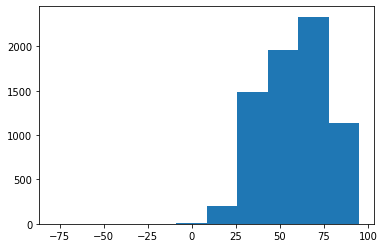

In [48]:
### 2. temporature
# check the distribution of temperature
plt.hist(data['Temperature(F)'])
plt.show()

In [49]:
def tempset(data):
        # if temp < 0 -> 0, if 0 < temp < 32 -> 1, 33 < tmp < 60 -> 2, 60 < tmp < 80 -> 3, 80 < temp < 100 -> 4, temp > 100 -> 5
        if data['Temperature(F)'] <= 0: 
            return 0
        elif data['Temperature(F)'] > 0 and data['Temperature(F)'] <= 32: 
            return 1
        elif data['Temperature(F)']> 33 and data['Temperature(F)'] <= 60: 
            return 2
        elif data['Temperature(F)'] > 60 and data['Temperature(F)'] <= 90: 
            return 3
        else:
            return 4
data['Temperature(scale)'] = data.apply(lambda x: tempset(x), axis = 1)


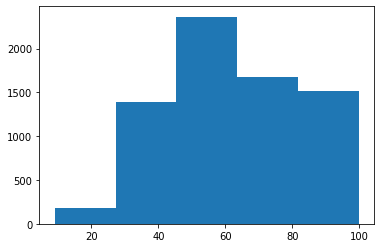

In [50]:
### 3. humidity
# check the distribution of humidity
plt.hist(data['Humidity(%)'], bins = 5)
plt.show()

In [51]:
def humset(data):
        # if humidity < 20 -> 0, if 20 < humidity < 40 -> 1, 40 < humidity < 60 -> 2, 60 < humidity < 80 -> 3, 80 < humidity -> 4 
        if data['Humidity(%)'] < 20: 
            return 0
        elif data['Humidity(%)'] > 20 and data['Humidity(%)'] <= 40: 
            return 1
        elif data['Humidity(%)']> 40 and data['Humidity(%)'] <= 60: 
            return 2
        elif data['Humidity(%)'] > 60 and data['Humidity(%)'] <= 80: 
            return 3
        else:
            return 4
data['Humidity(scale)'] = data.apply(lambda x: humset(x), axis = 1)


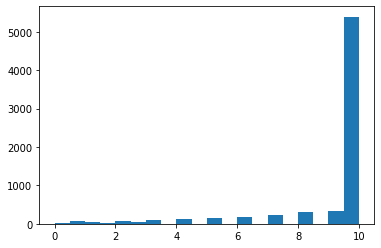

In [52]:
### 4. visibility
# check the distribution of visibility
plt.hist(data['Visibility(mi)'], bins = 20)
plt.show()

In [53]:
def visualset(data):
        # if visibility < 10 -> 0, else 1 
        if data['Visibility(mi)'] < 9: 
            return 0
        else: 
            return 1

data['Visibility(scale)'] = data.apply(lambda x: visualset(x), axis = 1)


In [54]:
### 4. visibility
# check the distribution of temperature
pd.set_option('display.max_row', 1000)
data['Weather_Condition'].unique()

array(['Overcast', 'Mostly Cloudy', 'Partly Cloudy', 'Clear',
       'Light Rain', 'Thunderstorm', 'Scattered Clouds', 'Haze', 'Rain',
       'Heavy Rain', 'Light Snow', 'Snow', 'Fog', 'Mist', 'Heavy Snow',
       'Light Freezing Rain', 'Fair', 'Cloudy', 'Cloudy / Windy',
       'Wintry Mix', 'Light Rain / Windy'], dtype=object)

In [55]:
#### 5. weather type
# categorize weathers to three types: 0. extrem 1.clear 2. other
def weatherset(data):
        if 'Heavy' in data['Weather_Condition'] or 'storm' in data['Weather_Condition']or 'Storm' in data['Weather_Condition'] or 'Squalls' in data['Weather_Condition'] or 'Dust' in data['Weather_Condition']: 
            return 0
        elif 'Clear' in data['Weather_Condition'] or 'Fair' in data['Weather_Condition']:
            return 1
        else:
            return 2
data['Weather(scale)'] = data.apply(lambda x: weatherset(x), axis = 1)


(array([  70., 3621., 3436.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

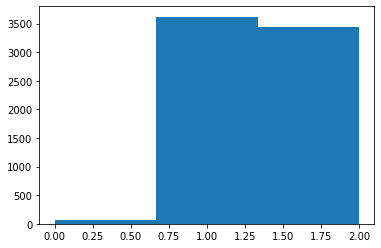

In [56]:
plt.hist(data['Weather(scale)'], bins = 3)


In [57]:
#### 6. duration
def duration(data):
        diff = data['End_Time']- data['Start_Time']
        # convert the time differences to minutes 
        minutes = diff.total_seconds() / 60
        return minutes
data['Duration'] = data.apply(lambda x: duration(x), axis = 1)

In [58]:
#### 7. wind speed (round)
data['Wind_Speed(mph)']=data['Wind_Speed(mph)'].astype('int')

In [59]:
#### 8. distance
# if >0 -> 1, <= 0 ->0
row_indexes=data[data['Distance(mi)']>0].index
data.loc[row_indexes,'Influence']=1
row_indexes=data[data['Distance(mi)']<=0].index
data.loc[row_indexes,'Influence']=0

In [60]:
#### 9. count 

# if more than two of the measurements are day -> day
# otherwise -> night

# count how many days there are in one row
def countt (data):
    a = 0
    b = 0
    c = 0
    d = 0
    sum = 0
    if data['Sunrise_Sunset'] == 'Day':
        a = a+1
    if data['Civil_Twilight'] == 'Day':
        b = b+1
    if data['Nautical_Twilight'] == 'Day':
        c = c+1
    if data['Astronomical_Twilight'] == 'Day':
        d = d+1
        
    sum = a+b+c+d
    return sum

def daynight(data):
    sum = countt(data)
    if sum >=3:
        return 1
    else:
        return 0

data['Day_Night'] = data.apply(lambda x: daynight(x), axis = 1)


### text mining

In [ ]:
#### 10.discription

In [85]:
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shuyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shuyu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [86]:
# define the word's tag
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# clean the text
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove specific stop words
    specific_stop_words = ['ave','rd','st','accident','route','state','due']
    text = [z for z in text if z not in specific_stop_words]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    return(text)

In [87]:
# generate the clean version of the description
data["Description_Clean"] = data["Description"].apply(lambda x: clean_text(x))

(-0.5, 1439.5, 1079.5, -0.5)

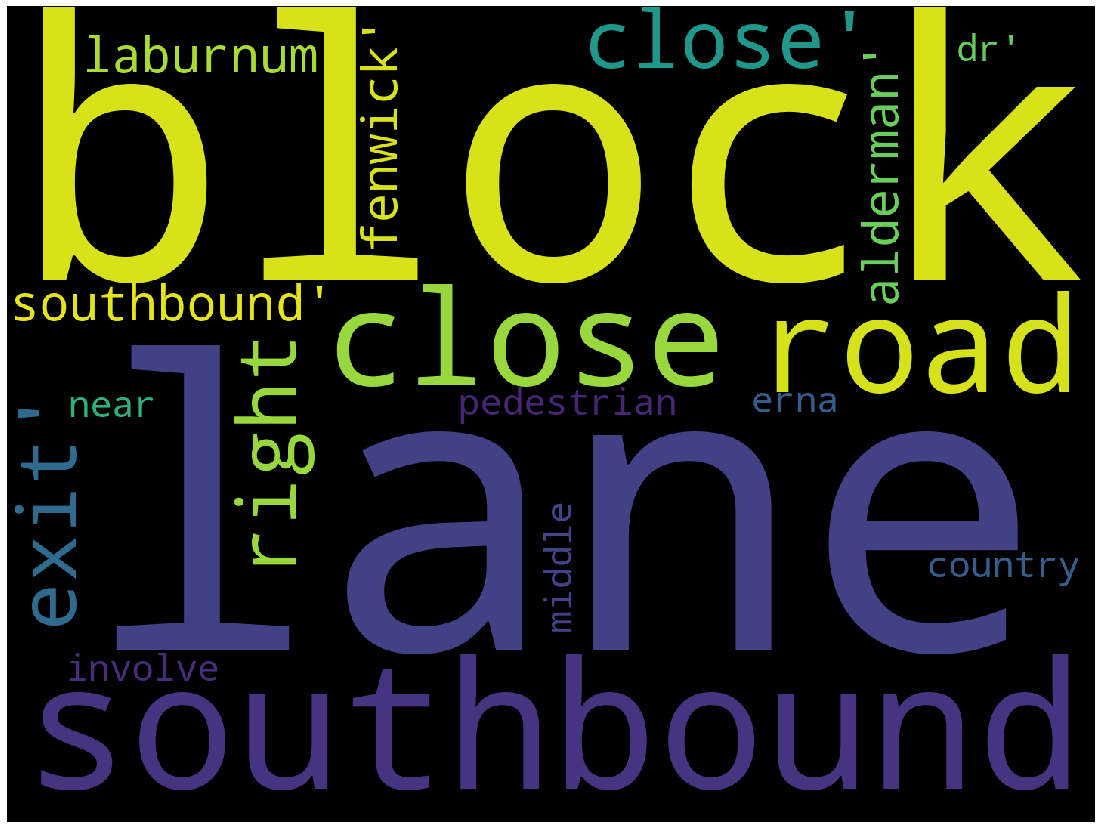

In [90]:
# Plot the word cloud
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(str(data.Description_Clean.astype(str).values))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [91]:
# generate the vectors of the clean words
ngram_vect = TfidfVectorizer(ngram_range = (1,2))
data['tf_idf'] = ngram_vect.fit_transform(data["Description_Clean"])

In [95]:
ngram_vect.get_feature_names()

110150

In [ ]:
data_clean

In [61]:
# drop the original data
data_clean = data.drop(['Start_Time','End_Time','Temperature(F)','Humidity(%)',
                 'Visibility(mi)','Wind_Speed(mph)','Weather_Condition',
                 'Distance(mi)','Sunrise_Sunset',
                 'Civil_Twilight','Nautical_Twilight','Astronomical_Twilight',
                 'Description'], axis=1)

In [62]:
data_clean = data_clean.drop(['tf_idf'], axis = 1)

KeyError: "['tf_idf'] not found in axis"

In [39]:
data_clean.to_csv('cleaned_data_ny.csv')

In [40]:
# import the cleaned data
data = pd.read_csv('cleaned_data_ny.csv')

In [41]:
data.head()

,Unnamed: 0,ID,Severity,Side,County,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Temperature(scale),Humidity(scale),Visibility(scale),Weather(scale),Duration,Influence,Day_Night
0,2349762,A-2349786,2,R,New York,False,False,False,False,True,False,False,False,False,False,False,False,2,2,1,2,360.0,1.0,1
1,2349788,A-2349812,3,R,New York,False,False,False,False,False,False,False,False,False,False,False,False,2,2,1,2,360.0,1.0,1
2,2349791,A-2349815,3,R,New York,False,False,False,False,False,False,False,False,False,False,False,False,2,2,1,2,360.0,1.0,1
3,2349801,A-2349825,2,R,New York,False,False,False,False,False,False,False,False,False,False,False,False,2,3,1,2,360.0,1.0,1
4,2349804,A-2349828,2,R,New York,False,False,False,False,False,False,False,False,False,False,False,True,2,3,1,2,360.0,1.0,1


In [63]:
data_clean = data_clean.drop(['County'], axis = 1)

In [64]:
# make all of the data categorical variables
le = LabelEncoder()
data_encoded = data_clean.apply(le.fit_transform)

In [65]:
data_encoded

,ID,Severity,Side,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Temperature(scale),Humidity(scale),Visibility(scale),Weather(scale),Duration,Influence,Day_Night
2349762,3524,1,1,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,2,1193,1,1
2349788,3525,2,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1193,1,1
2349791,3526,2,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1193,1,1
2349801,3527,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3,1,2,1193,1,1
2349804,3528,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2,3,1,2,1193,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518708,5844,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3,1,2,184,0,1
518713,5845,1,1,0,0,1,0,0,0,0,0,0,0,0,0,2,3,1,2,727,0,1
518723,5846,1,1,0,0,1,0,0,0,0,0,0,0,0,0,2,3,1,2,545,0,0
2493978,4038,3,0,0,0,0,0,0,0,1,0,1,0,0,1,2,3,1,2,119,1,0


In [66]:
data_encoded.dtypes

ID                    int32
Severity              int64
Side                  int32
Amenity               int64
Bump                  int64
Crossing              int64
Give_Way              int64
Junction              int64
No_Exit               int64
Railway               int64
Roundabout            int64
Station               int64
Stop                  int64
Traffic_Calming       int64
Traffic_Signal        int64
Temperature(scale)    int64
Humidity(scale)       int64
Visibility(scale)     int64
Weather(scale)        int64
Duration              int64
Influence             int64
Day_Night             int64
dtype: object

In [67]:
# make dummy variables
data_dummy = pd.get_dummies(data_encoded, columns = ['Temperature(scale)',
                                                    'Humidity(scale)',
                                                    'Weather(scale)'])

In [68]:
# seperate the training and test set
y = data_dummy['Severity']
X = data_dummy.copy()

In [69]:
X = X.drop('Severity', axis = 1)
X = X.drop('ID', axis = 1)
X.head()

,Side,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Visibility(scale),Duration,Influence,Day_Night,Temperature(scale)_0,Temperature(scale)_1,Temperature(scale)_2,Temperature(scale)_3,Temperature(scale)_4,Humidity(scale)_0,Humidity(scale)_1,Humidity(scale)_2,Humidity(scale)_3,Humidity(scale)_4,Weather(scale)_0,Weather(scale)_1,Weather(scale)_2
2349762,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1193,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1
2349788,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1193,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1
2349791,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1193,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1
2349801,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1193,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1
2349804,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1193,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1


In [49]:
# normalize the data 
from sklearn import preprocessing
X = preprocessing.normalize(X)

### decision tree/knn/logistic regression w normalization & dummy variables

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.3, random_state=42)
dt_basic = DecisionTreeClassifier()
dt_basic.fit(X_train, y_train)
y_predict = dt_basic.predict(X_test)
print('DT:',accuracy_score(y_test, y_predict))

DT: 0.6947171575502571


In [101]:
rf_basic = RandomForestClassifier()
rf_basic.fit(X_train, y_train)
rf_predict = rf_basic.predict(X_test)
print('RF:',accuracy_score(y_test, y_predict))

RF: 0.6947171575502571


In [52]:
knn_basic = KNeighborsClassifier()
knn_basic.fit(X_train, y_train)
y_predict = knn_basic.predict(X_test)
print('KNN:',accuracy_score(y_test, y_predict))

KNN: 0.7148200093501637


In [53]:
from sklearn.linear_model import LogisticRegression
lr_basic = LogisticRegression()
lr_basic.fit(X_train, y_train)
y_predict = lr_basic.predict(X_test)
print('logistic regression:',accuracy_score(y_test, y_predict))

logistic regression: 0.6900420757363254


In [54]:
xgb_basic = XGBClassifier()
xgb_basic.fit(X_train, y_train)
y_predict = xgb_basic.predict(X_test)
print('xgb: ',accuracy_score(y_test, y_predict))

xgb:  0.7466105656848995


In [55]:
lgbm_basic = LGBMClassifier()
lgbm_basic.fit(X_train, y_train)
y_predict = lgbm_basic.predict(X_test)
print('lgbm: ',accuracy_score(y_test, y_predict))

lgbm:  0.7424029920523609


### feature selection

In [102]:
for feature in zip(data_dummy.columns, rf_basic.feature_importances_):
    print(feature)

('ID', 0.015760081811888437)
('Severity', 0.022609467909153663)
('Side', 0.0)
('Amenity', 0.01881902378520851)
('Bump', 0.0)
('Crossing', 0.031643277321533374)
('Give_Way', 0.009694597468525499)
('Junction', 0.003801343224392448)
('No_Exit', 0.0)
('Railway', 0.011166051109471532)
('Roundabout', 0.011436104897283608)
('Station', 0.0)
('Stop', 0.053129335424474934)
('Traffic_Calming', 0.0258331570449617)
('Traffic_Signal', 0.538827939637844)
('Visibility(scale)', 0.05221652520259004)
('Duration', 0.03792670250360754)
('Influence', 0.0)
('Day_Night', 0.012108740773334785)
('Temperature(scale)_0', 0.018777047758500802)
('Temperature(scale)_1', 0.02011370597336057)
('Temperature(scale)_2', 0.004244597943277226)
('Temperature(scale)_3', 0.004226212697643987)
('Temperature(scale)_4', 0.015699650214507165)
('Humidity(scale)_0', 0.019822463805203586)
('Humidity(scale)_1', 0.018756146318844234)
('Humidity(scale)_2', 0.01631000393911258)
('Humidity(scale)_3', 0.0028742514269068254)
('Humidity(sca

### Grid search & PCA


In [60]:
from sklearn import decomposition
from sklearn import pipeline
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier()

# Create a pca object
pca = decomposition.PCA()

# tranform the data with PCA.
# Third, train a Decision Tree Classifier on the data.
pipe = pipeline.Pipeline(steps=[('pca', pca),
                           ('lgbm', lgbm)])

    
# Create lists of parameter for lgbmclassifier

    
params = {'lgbm__num_leaves': [60,70,80],
         'lgbm__max_depth': [4,8,12,16]}

lgbm_pca = GridSearchCV(estimator=pipe , param_grid=params, cv = 10)

In [61]:
lgbm_pca.fit(X_train, y_train)

C:\Users\Shuyu\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('lgbm',
                                        LGBMClassifier(boosting_type='gbdt',
                                                       class_weight=None,
                                                       colsample_bytree=1.0,
                                                       importance_type='split',
                                                       learning_rate=0.1,
                                                       max_depth=-1,
                                    

In [62]:
print('Best num_leaves:', lgbm_pca.best_estimator_.get_params()['lgbm__num_leaves'])
print('Best max_depth:', lgbm_pca.best_estimator_.get_params()['lgbm__max_depth'])

print(lgbm_pca.best_estimator_.get_params()['lgbm'])

Best num_leaves: 60
Best max_depth: 4
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=4,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=60, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [63]:
y_predict = lgbm_pca.predict(X_test)
accuracy_score(y_test, y_predict)

0.7367928938756428

In [75]:
from sklearn import decomposition
from sklearn import pipeline
from sklearn.model_selection import GridSearchCV

xgb= XGBClassifier()

# Create a pca object
pca = decomposition.PCA()

# tranform the data with PCA.
# Third, train a Decision Tree Classifier on the data.
pipe = pipeline.Pipeline(steps=[('pca', pca),
                           ('xgb', xgb)])

    
# Create lists of parameter for lgbmclassifier

    
params = {'xgb__min_child_weight': [1,3,5,7],
         'xgb__max_depth': [4,8,12,16],
         'xgb__max_depth ': [4, 5 ,6]}

xgb_params_pca = GridSearchCV(estimator=pipe , param_grid=params, cv = 5)

In [76]:
xgb_params_pca.fit(X_train, y_train)

C:\Users\Shuyu\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learnin

In [77]:
y_predict = xgb_params_pca.predict(X_test)
accuracy_score(y_test, y_predict)

0.7321178120617111

### resampling inbalanced dataset


In [70]:
count_class_1, count_class_2, count_class_3, count_class_0 = data_dummy.Severity.value_counts()

In [71]:
data_dummy.Severity.value_counts()

1    4879
2    2055
3    192 
0    1   
Name: Severity, dtype: int64

In [72]:
df_class_1 = data_dummy[data_dummy['Severity'] == 1]
df_class_2 = data_dummy[data_dummy['Severity'] == 2]
df_class_3 = data_dummy[data_dummy['Severity'] == 3]

In [73]:
df_class_1 = df_class_1.sample(count_class_3)
df_class_2 = df_class_2.sample(count_class_3)

In [74]:
df = pd.concat([df_class_1, df_class_2], axis=0)
df = pd.concat([df, df_class_3], axis=0)


In [75]:
df.Severity.value_counts()

3    192
2    192
1    192
Name: Severity, dtype: int64

In [76]:
df

,ID,Severity,Side,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Visibility(scale),Duration,Influence,Day_Night,Temperature(scale)_0,Temperature(scale)_1,Temperature(scale)_2,Temperature(scale)_3,Temperature(scale)_4,Humidity(scale)_0,Humidity(scale)_1,Humidity(scale)_2,Humidity(scale)_3,Humidity(scale)_4,Weather(scale)_0,Weather(scale)_1,Weather(scale)_2
2732117,4384,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,195,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1
1196756,418,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,178,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2654532,4216,1,1,1,0,0,0,1,0,0,0,0,0,0,1,1,192,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1
975917,7074,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,600,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2907572,4967,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,187,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0
1220930,454,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,188,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1074774,187,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,844,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
371771,5277,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,175,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0
640041,6121,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,361,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2910035,4979,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,78,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0


In [77]:
# seperate the training and test set
y_b = df['Severity']
X_b = df.copy()
X_b = X_b.drop('Severity', axis = 1)
X_b = X_b.drop('ID', axis = 1)
from sklearn import preprocessing
X_b = preprocessing.normalize(X_b)

In [78]:
### decision tree/knn/logistic regression w normalization & dummy variables

In [97]:
from sklearn.linear_model import LogisticRegression

Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_b, y_b, 
                                        test_size=0.3, random_state=42)
dt_basic = LGBMClassifier()
dt_basic.fit(Xb_train, yb_train)
yb_predict = dt_basic.predict(Xb_test)
print('DT:',accuracy_score(yb_test, yb_predict))

DT: 0.5722543352601156


## clustering

In [392]:
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

C:\Users\Shuyu\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()